# Segundo avanze del PIA

Equipo 2

                Grupo 012, martes y jueves de 18:30 a 20:00 hrs
                
Integrantes:
    1395501 Jose Pedro Treviño Hernandez
    1647656 Omar Alejandro Delgado Lozano

# BASE DE DATOS: Trip Advisor Hotel Reviews

La base de datos de Trip Advisor Hotel Reviews contiene mas de 20,000 reviews o reseñas de diferentes hoteles ademas de calificaciones dadas por los huspedes.


In [30]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load
# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 5GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

# LIBRERIAS

In [68]:
import numpy as np
import re 
import pandas as pd
import missingno as msno
import seaborn as sns
import nltk 
from nltk import word_tokenize,sent_tokenize
import nltk as nlp
import warnings
warnings.filterwarnings("ignore")
import plotly.graph_objects as go
#import plotly.express as px
import matplotlib.pyplot as plt
import spacy
import tensorflow as tf
from wordcloud import WordCloud, STOPWORDS 
import ktrain
from ktrain import text

from collections import Counter
%matplotlib inline

Se planea usar estas librerrias ya que son las que satisfacen las necesidades de busqueda de palabras y almacenamiento de ellas,ademas de ayudarnos para la visualizacion de datos en forma de graficos. 
por lo tanto dichas librerias son las que se estaran manejando.

### Base de datos
Aqui se despliega la base de datos que seleccionamos 
https://www.kaggle.com/andrewmvd/trip-advisor-hotel-reviews

In [32]:
df = pd.read_csv('tripadvisor_hotel_reviews.csv');
df.head()

,Review,Rating
0,nice hotel expensive parking got good deal sta...,4
1,ok nothing special charge diamond member hilto...,2
2,nice rooms not 4* experience hotel monaco seat...,3
3,"unique, great stay, wonderful time hotel monac...",5
4,"great stay great stay, went seahawk game aweso...",5


In [33]:
df.shape

(20491, 2)

In [56]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20491 entries, 0 to 20490
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Review     20491 non-null  object
 1   Rating     20491 non-null  int64 
 2   Sentiment  20491 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 480.4+ KB


In [57]:
df.columns

Index(['Review', 'Rating', 'Sentiment'], dtype='object')

In [58]:
df.isnull()

,Review,Rating,Sentiment
0,False,False,False
1,False,False,False
2,False,False,False
3,False,False,False
4,False,False,False
...,...,...,...
20486,False,False,False
20487,False,False,False
20488,False,False,False
20489,False,False,False


In [59]:
df.isnull().sum()

Review       0
Rating       0
Sentiment    0
dtype: int64

#### Primera parte del PIA
Como la base de datos solo cuenta con dos columnas, estas dos solo son necesarias, no es necesario el eliminar ni modificar las columnas ya que seran utiles para los siguientes pasos.

In [61]:
baseD = df
baseD.to_csv('baseD_editada.csv', index=False)

In [62]:
df['Rating'].median() #muestra la media

4.0

In [63]:
df['Rating'].var() #muestra la varianza

1.5203624326830831

In [64]:
df['Rating'].std() #muestra la desviacion estandar

1.2330297776952035

In [69]:
review_list=[]

for review in df.Review:
    review=re.sub("[^a-zA-z]"," ",review) 
    review=review.lower()
    review=nltk.word_tokenize(review) 
    lemma=nlp.WordNetLemmatizer()
    review=[lemma.lemmatize(word) for word in review] 
    review=" ".join(review)
    review_list.append(review)

# Sentiment Visualisation

In [35]:
pos = [4, 5]
neg = [1, 2]
neu = [3]

def sentiment(rating):
  if rating in pos:
    return 2
  elif rating in neg:
    return 0
  else:
    return 1  

In [36]:
df['Sentiment'] = df['Rating'].apply(sentiment)
df.head()

,Review,Rating,Sentiment
0,nice hotel expensive parking got good deal sta...,4,2
1,ok nothing special charge diamond member hilto...,2,0
2,nice rooms not 4* experience hotel monaco seat...,3,1
3,"unique, great stay, wonderful time hotel monac...",5,2
4,"great stay great stay, went seahawk game aweso...",5,2


In [70]:
fig = go.Figure([go.Bar(x=df.Sentiment.value_counts().index, y=df.Sentiment.value_counts().tolist())])
fig.update_layout(
    title="visualizacion de sentimientos",
    xaxis_title="Sentimiento",
    yaxis_title="Valores")
fig.show()


2 - Positivo(4, 5)<br>
1 - Neutral (3)<br>
0 - Negativo (1, 2)

## palabras usadas en general


In [38]:
nlp = spacy.load('en_core_web_sm')

def normalize(msg):
    
    doc = nlp(msg)
    res = []
    
    for token in doc:
        if(token.is_stop or token.is_punct or token.is_space):
            pass
        else:
            res.append(token.lemma_.lower())
            
    return res

In [39]:
df['Review'] = df['Review'].apply(normalize)
df.head()

,Review,Rating,Sentiment
0,"[nice, hotel, expensive, parking, get, good, d...",4,2
1,"[ok, special, charge, diamond, member, hilton,...",2,0
2,"[nice, room, 4, experience, hotel, monaco, sea...",3,1
3,"[unique, great, stay, wonderful, time, hotel, ...",5,2
4,"[great, stay, great, stay, go, seahawk, game, ...",5,2


In [40]:
words_collection = Counter([item for sublist in df['Review'] for item in sublist])
freq_word_df = pd.DataFrame(words_collection.most_common(15))
freq_word_df.columns = ['frequently_used_word','count']

freq_word_df.style.background_gradient(cmap='PuBuGn', low=0, high=0, axis=0, subset=None)

,frequently_used_word,count
0,hotel,52580
1,room,46618
2,stay,27472
3,good,21480
4,great,21290
5,staff,16367
6,night,13917
7,day,12945
8,nice,12847
9,time,11891


## GENERAL

In [41]:
word_list = [item for sublist in df['Review'] for item in sublist]
word_string = " ".join(word_list)

wordcloud = WordCloud(stopwords=STOPWORDS,
                          background_color='white', 
                      max_words=60000, 
                      width=1000,
                      height=650
                         ).generate(word_string)

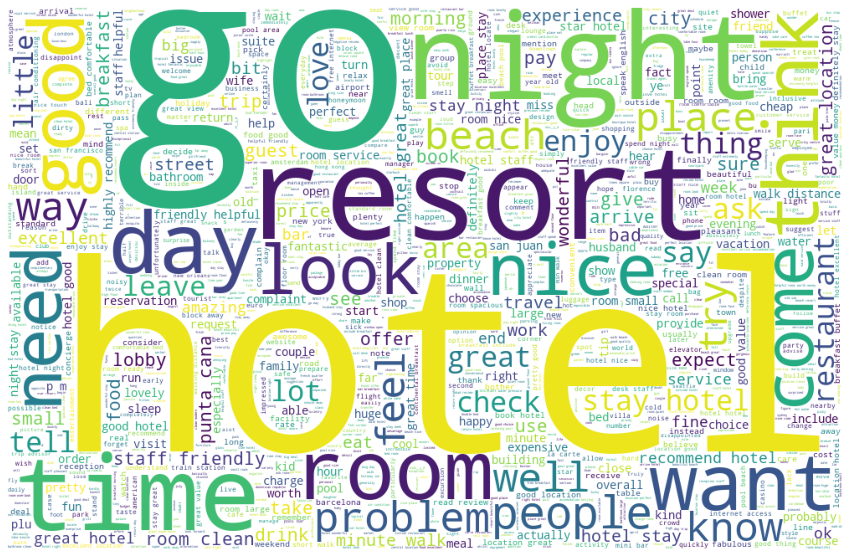

In [42]:
plt.figure(figsize=(20,10))
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

## Positiva

In [44]:
word_list_pos = [item for sublist in pos_df['Review'] for item in sublist]
word_string_pos = " ".join(word_list)

wordcloud = WordCloud(stopwords=STOPWORDS,
                          background_color='white', 
                      max_words=40000, 
                      width=1000,
                      height=650
                         ).generate(word_string_pos)

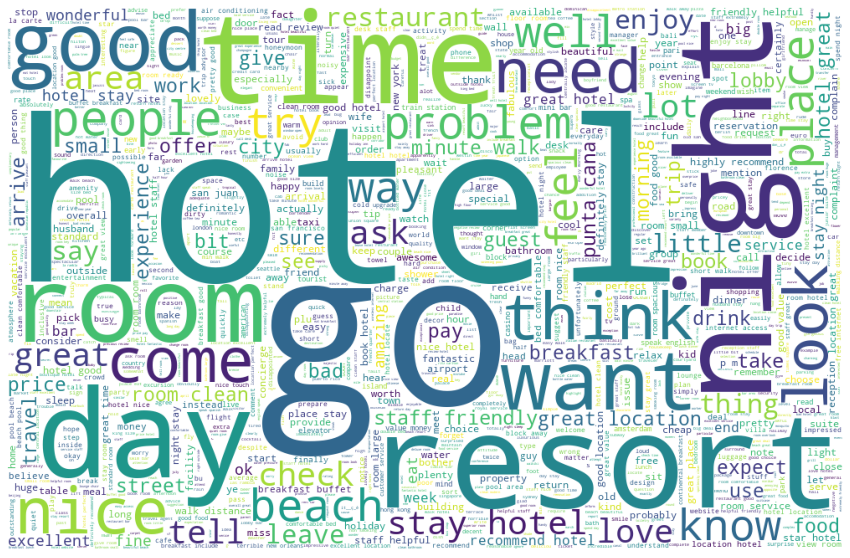

In [45]:
plt.figure(figsize=(20,10))
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

## Neutral

In [46]:
neu_df = df[df['Sentiment'] == 1]
words_collection = Counter([item for sublist in neu_df['Review'] for item in sublist])
freq_word_df = pd.DataFrame(words_collection.most_common(15))
freq_word_df.columns = ['frequently_used_word','count']

freq_word_df.style.background_gradient(cmap='PuBuGn', low=0, high=0, axis=0, subset=None)

,frequently_used_word,count
0,room,5957
1,hotel,5495
2,good,2833
3,stay,2665
4,nice,1821
5,great,1775
6,night,1729
7,staff,1493
8,day,1489
9,location,1430


In [47]:
word_list_neu = [item for sublist in neu_df['Review'] for item in sublist]
word_string_neu = " ".join(word_list)

wordcloud = WordCloud(stopwords=STOPWORDS,
                          background_color='white', 
                      max_words=6000, 
                      width=1000,
                      height=650
                         ).generate(word_string_neu)

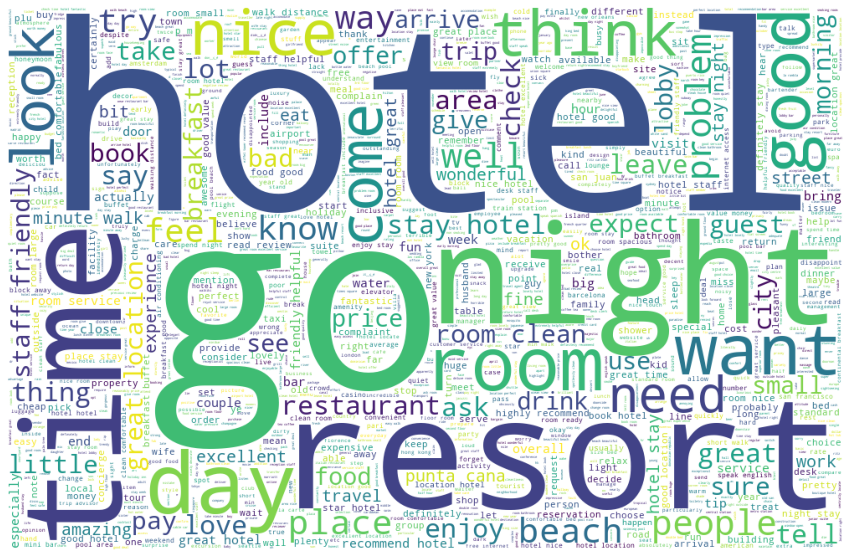

In [48]:
plt.figure(figsize=(20,10))
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

## Negativa

In [49]:
neg_df = df[df['Sentiment'] == 0]
words_collection = Counter([item for sublist in neg_df['Review'] for item in sublist])
freq_word_df = pd.DataFrame(words_collection.most_common(15))
freq_word_df.columns = ['frequently_used_word','count']

freq_word_df.style.background_gradient(cmap='PuBuGn', low=0, high=0, axis=0, subset=None)

,frequently_used_word,count
0,room,9842
1,hotel,8395
2,stay,4430
3,day,2745
4,night,2690
5,good,2592
6,staff,2278
7,service,2197
8,time,2154
9,go,1951


In [50]:
word_list_neg = [item for sublist in neg_df['Review'] for item in sublist]
word_string_neg = " ".join(word_list)

wordcloud = WordCloud(stopwords=STOPWORDS,
                          background_color='white', 
                      max_words=10000, 
                      width=1000,
                      height=650
                         ).generate(word_string_neg)

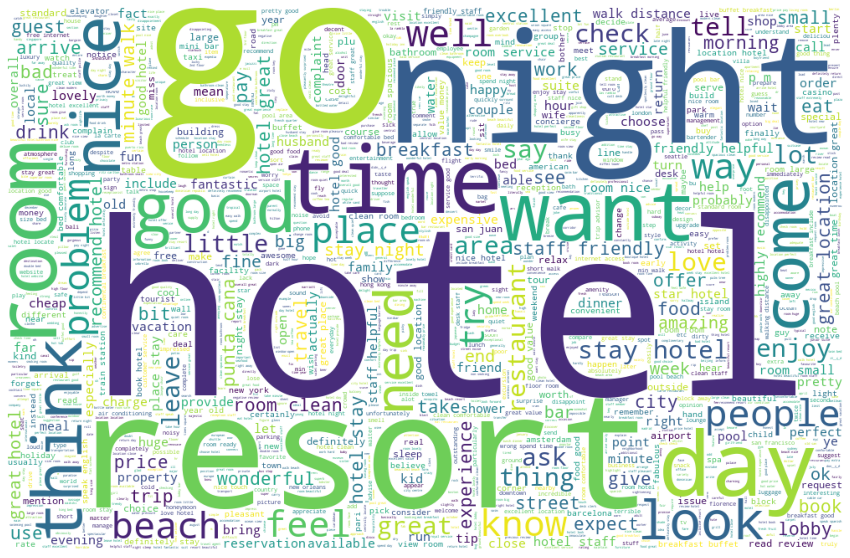

In [51]:
plt.figure(figsize=(20,10))
plt.imshow(wordcloud)
plt.axis('off')
plt.show()